In [671]:
import pandas as pd
import numpy as np
# Libraries to help with data visualization
import matplotlib.pyplot as plt

import seaborn as  sns


In [672]:
customer_read = pd.read_csv('customer_analysis.csv', sep = ";")
customer_data = pd.DataFrame(customer_read)

In [673]:
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,WinesProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2019-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2021-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2020-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2021-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2021-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [674]:
customer_data.shape

(2244, 29)

# explain columns

#### NumCatalogPurchases - # of purchases made on the catalog
#### NumStorePurchases - # of purchase made in store
#### NumWebVisitsMonth - # of website visits in the last month
#### AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
#### AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
#### AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
#### AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
#### AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
#### Response - 1 if customer accepted the offer in the last ID - Customer's unique identification
#### Year_Birth - Customer's birth year
#### Education - Customer's education
#### Marital_Status - Customer's marital status
#### Income - Customer's yearly household income
#### Kidhome - # of kids in household
#### Teenhome - # of teenagers in household
#### Dt_Customer - Date of customer's enrollment with the company
#### Recency - # of days since customer's last purchase
#### MntWines - Amount spent on wine in the last 2 years
#### MntFruits - Amount spent on fruit in the last 2 years
#### MntMeatProducts - Amount spent on meat in the last 2 years
#### MntFishProducts - Amount spent on fish in the last 2 years
#### MntSweetProducts - Amount spent on sweet products in the last 2 years
#### MntGoldProds - Amount spent on gold products in the last 2 years
#### NumDealsPurchases - # of purchases made with a discount
#### NumWebPurchases - # of purchases made on company wecampaign, 0 otherwise
#### Complain - 1 if customer complained within the last 2 years
#### Country - Country where the customer is located (not from)

In [675]:
customer_data.shape

(2244, 29)

In [676]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2244 entries, 0 to 2243
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2244 non-null   int64  
 1   Year_Birth           2244 non-null   int64  
 2   Education            2244 non-null   object 
 3   Marital_Status       2244 non-null   object 
 4   Income               2220 non-null   float64
 5   Kidhome              2244 non-null   int64  
 6   Teenhome             2244 non-null   int64  
 7   Dt_Customer          2244 non-null   object 
 8   Recency              2244 non-null   int64  
 9   WinesProducts        2244 non-null   int64  
 10  FruitsProducts       2244 non-null   int64  
 11  MeatProducts         2244 non-null   int64  
 12  FishProducts         2244 non-null   int64  
 13  SweetProducts        2244 non-null   int64  
 14  GoldProducts         2244 non-null   int64  
 15  NumDealsPurchases    2244 non-null   i

In [677]:
#Income column has null values..
customer_data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
WinesProducts           0
FruitsProducts          0
MeatProducts            0
FishProducts            0
SweetProducts           0
GoldProducts            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [678]:
# "inplace" = True, to make changes in actual data..
customer_data.dropna(axis = 0, inplace = True)


In [679]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2220.0,5595.278829,3250.537882,0.0,2823.25,5482.5,8433.75,11191.0
Year_Birth,2220.0,1968.835135,11.979772,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2220.0,53327.439640,35769.863967,1730.0,35335.50,51411.5,68655.50,667456.0
Kidhome,2220.0,0.442793,0.536934,0.0,0.00,0.0,1.00,2.0
Teenhome,2220.0,0.504505,0.544113,0.0,0.00,0.0,1.00,2.0
Recency,2220.0,48.965766,28.943290,0.0,24.00,49.0,74.00,99.0
WinesProducts,2220.0,304.558108,337.257701,0.0,23.00,173.5,505.00,1493.0
FruitsProducts,2220.0,26.333784,39.761488,0.0,2.00,8.0,33.00,199.0
MeatProducts,2220.0,166.727477,224.170148,0.0,16.00,68.0,232.00,1725.0
FishProducts,2220.0,37.584234,54.717156,0.0,3.00,12.0,50.00,259.0


In [680]:
#category_cols contain categorical variables
cat_cols=['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', '']

In [681]:
# Printing the count of each unique value in each column
for column in cat_cols:
    print(column)
    print(customer_data[column].value_counts())
    print("-" * 40)# Printing the count of each unique value in each column
for column in cat_cols:
    print(column)
    print(customer_data[column].value_counts())
    print("-" * 40)

Education
Graduation    1120
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
----------------------------------------
Marital_Status
Married     857
Together    577
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
----------------------------------------
AcceptedCmp3
0    2057
1     163
Name: AcceptedCmp3, dtype: int64
----------------------------------------
AcceptedCmp4
0    2056
1     164
Name: AcceptedCmp4, dtype: int64
----------------------------------------
AcceptedCmp5
0    2058
1     162
Name: AcceptedCmp5, dtype: int64
----------------------------------------
AcceptedCmp1
0    2078
1     142
Name: AcceptedCmp1, dtype: int64
----------------------------------------
AcceptedCmp2
0    2190
1      30
Name: AcceptedCmp2, dtype: int64
----------------------------------------
Complain
0    2199
1      21
Name: Complain, dtype: int64
------------

### In education, 2n cycle and Master means the same thing. We can combine these two categories.
### There are many categories in marital status. We can combine the category 'Alone' with 'Single'.
### It is not clear from the data that what do the terms 'Absurd', and 'YOLO' actually mean. We can combine these categories to make a new category - 'Others'.
### There are only 21 customers who complained in the last two years.
### The most common educational status is Graduation
### The most common marital status is Married

In [682]:
# Replacing 2n Cycle with Master

customer_data["Education"].replace("2n Cycle", "Master", inplace=True)
# Replacing YOLO, Alone, Absurd with Single

customer_data["Marital_Status"].replace(["Alone", "Absurd", "YOLO"], "Single", inplace=True)
customer_data['Marital_Status'].replace("Together", "Married", inplace=True)

In [683]:
# تغیر مقادیرMarital_Status به Alone , In couple
customer_data['Marital_Status'] = customer_data['Marital_Status'].replace(
    {'Divorced': 'Alone', 'Single': 'Alone', 'Married': 'In couple',
     'Together': 'In couple', 'others': 'Alone', 'Widow': 'Alone'})

# Education => Postgraduate ,  Undergraduate
customer_data['Education'] = customer_data['Education'].replace(
    {'Basic': 'Undergraduate',
     'Graduation': 'Postgraduate', 'Master': 'Postgraduate',
     'PhD': 'Postgraduate'})

# محاسبه مجمون نوجوانان و کودکان
customer_data['Children'] = customer_data['Kidhome'] + customer_data['Teenhome']
# فرزند داشتن یا نداشن
customer_data['Has_child'] = np.where(customer_data.Children > 0, 'Has child', 'No child')
customer_data['Children'].replace(
    {3: "3 children", 2: '2 children', 1: '1 child', 0: "No child"},
    inplace=True)

In [684]:
customer_data.head(50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,WinesProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Has_child
0,5524,1957,Postgraduate,Alone,58138.0,0,0,2019-09-04,58,635,...,0,0,0,0,0,3,11,1,No child,No child
1,2174,1954,Postgraduate,Alone,46344.0,1,1,2021-03-08,38,11,...,0,0,0,0,0,3,11,0,2 children,Has child
2,4141,1965,Postgraduate,In couple,71613.0,0,0,2020-08-21,26,426,...,0,0,0,0,0,3,11,0,No child,No child
3,6182,1984,Postgraduate,In couple,26646.0,1,0,2021-02-10,26,11,...,0,0,0,0,0,3,11,0,1 child,Has child
4,5324,1981,Postgraduate,In couple,58293.0,1,0,2021-01-19,94,173,...,0,0,0,0,0,3,11,0,1 child,Has child
5,7446,1967,Postgraduate,In couple,62513.0,0,1,2020-09-09,16,520,...,0,0,0,0,0,3,11,0,1 child,Has child
6,965,1971,Postgraduate,Alone,55635.0,0,1,2019-11-13,34,235,...,0,0,0,0,0,3,11,0,1 child,Has child
7,6177,1985,Postgraduate,In couple,33454.0,1,0,2020-05-08,32,76,...,0,0,0,0,0,3,11,0,1 child,Has child
8,4855,1974,Postgraduate,In couple,30351.0,1,0,2020-06-06,19,14,...,0,0,0,0,0,3,11,1,1 child,Has child
9,5899,1950,Postgraduate,In couple,5648.0,1,1,2021-03-13,68,28,...,0,0,0,0,0,3,11,0,2 children,Has child


In [685]:
customer_data = customer_data.drop(columns=['Kidhome', 'Teenhome', ], axis=0)
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Has_child
0,5524,1957,Postgraduate,Alone,58138.0,2019-09-04,58,635,88,546,...,0,0,0,0,0,3,11,1,No child,No child
1,2174,1954,Postgraduate,Alone,46344.0,2021-03-08,38,11,1,6,...,0,0,0,0,0,3,11,0,2 children,Has child
2,4141,1965,Postgraduate,In couple,71613.0,2020-08-21,26,426,49,127,...,0,0,0,0,0,3,11,0,No child,No child
3,6182,1984,Postgraduate,In couple,26646.0,2021-02-10,26,11,4,20,...,0,0,0,0,0,3,11,0,1 child,Has child
4,5324,1981,Postgraduate,In couple,58293.0,2021-01-19,94,173,43,118,...,0,0,0,0,0,3,11,0,1 child,Has child


In [687]:
# creating new features to get overll picture of a customer, how many children he/she has, total campaigns accepted etc.

# Spending total
customer_data['Spending'] = customer_data['WinesProducts'] + \
                            customer_data['FruitsProducts'] + \
                            customer_data['MeatProducts'] + \
                            customer_data['FishProducts'] + \
                            customer_data['SweetProducts'] + \
                            customer_data['GoldProducts']
#total purchases made by a customer
platform_col = [col for col in customer_data.columns if 'Purchases' in col]
customer_data['Total_Purchase'] = customer_data[platform_col].sum(axis = 1)


# Total no. of campaign accepted by a customer
campaigns_cols = [col for col in customer_data.columns if 'Cmp' in col]
customer_data['TotalCampaignsAcc'] = customer_data[campaigns_cols].sum(axis=1)

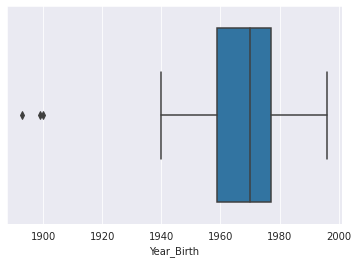

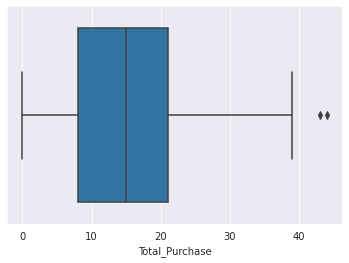

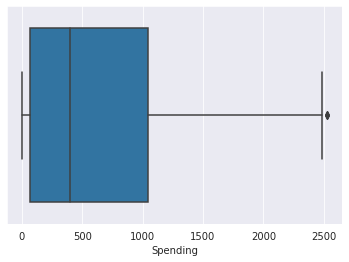

In [688]:
# Plotting boxplot for Year_Birth, Total_Spending, Total_Purchase

cols=['Year_Birth', 'Total_Purchase', 'Spending']
for i in cols:
    sns.boxplot(x=customer_data[i])
    plt.show()

## The birth year is reported as <=1900 for some users, while the current year is 2021. it's very unlikely that the person is alive. it may be a reporting error.
## There are some outliers in year_birth and total purchase.

In [689]:
customer_data[customer_data['Year_Birth'] < 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children,Has_child,Spending,Total_Purchase,TotalCampaignsAcc
239,11004,1893,Postgraduate,Alone,60182.0,2021-05-17,23,8,0,5,...,0,0,3,11,0,1 child,Has child,22,4,0
339,1150,1899,Postgraduate,In couple,83532.0,2020-09-26,36,755,144,562,...,0,0,3,11,0,No child,No child,1853,15,1


In [690]:
#keeping data for customers having birth year >1900
df = customer_data[customer_data['Year_Birth'] > 1900]

In [691]:
# delete outliers of total purchase column
df = df[df['Total_Purchase'] <= 40]

In [692]:
# delete outliers of spending column
df = df[df['Spending'] <= 2500]

In [695]:
# تبدیل سن به داده های nominal
age_gap_labels = ['Young', 'Adult', 'Mature', 'Senior']
age_gap = [0, 30, 45, 65, 120]
df['Age_group'] = pd.cut(df['Year_Birth'], bins=age_gap, labels=age_gap_labels)

In [696]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,WinesProducts,FruitsProducts,MeatProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Children,Has_child,Spending,Total_Purchase,TotalCampaignsAcc,Age_group
0,5524,1957,Postgraduate,Alone,58138.0,2019-09-04,58,635,88,546,...,0,3,11,1,No child,No child,1617,25,0,NaN
1,2174,1954,Postgraduate,Alone,46344.0,2021-03-08,38,11,1,6,...,0,3,11,0,2 children,Has child,27,6,0,NaN
2,4141,1965,Postgraduate,In couple,71613.0,2020-08-21,26,426,49,127,...,0,3,11,0,No child,No child,776,21,0,NaN
3,6182,1984,Postgraduate,In couple,26646.0,2021-02-10,26,11,4,20,...,0,3,11,0,1 child,Has child,53,8,0,NaN
4,5324,1981,Postgraduate,In couple,58293.0,2021-01-19,94,173,43,118,...,0,3,11,0,1 child,Has child,422,19,0,NaN


In [693]:
# drop colums that we use to create the total purchase and spending and NumberofChildren and TotalCampaignsAcc
df = df[
    ['Education', 'Marital_Status', 'Income', 'Spending', 'Seniority',
     'Has_child', 'Children', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets',
     'Gold']]

KeyError: "['Age', 'Seniority', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'] not in index"

In [ ]:
df.head()

In [ ]:
#plotting Boxplot for income'

plt.figure(figsize=(10,4))
sns.boxplot(df['Income'])
plt.title('Income boxplot', size=16)
plt.show()

In [ ]:
#Calculating the upper whisker for the Income variable

Q1 = df.quantile(q=0.25) #First quartile
Q3 = df.quantile(q=0.75) #Third quartile
IQR = Q3 - Q1            #Inter Quartile Range

upper_whisker = (Q3 + 1.5*IQR)['Income']   #Upper Whisker
print(upper_whisker)


In [ ]:
# delete outliers
df =df[df['Income'] < upper_whisker]

In [ ]:
# حذف داده های تکراری
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

In [ ]:
df.head()

In [ ]:
# str into datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],
                                            dayfirst=True, format='%Y-%m-%d')
df.head()


In [ ]:
from datetime import date

# محاسبه تعداد ماه ورود
last_date = date(2021, 10, 4)
df['Dt_Customer'] = pd.to_numeric(
    df['Dt_Customer'].dt.date.apply(lambda x: (last_date - x)).dt.days,
    downcast='integer') // 30
df.head()

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

### according to heatmap diagram income and spending are depend to each others and then total purchase and income

In [ ]:
df = pd.get_dummies(df)
df.head()

In [ ]:
data = df.to_csv()
with open('data_customer.csv', 'w') as f:
    f.write(data)

In [ ]:
df.head()